In [82]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import folium
from folium import Circle

### About data

- country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
- country_long` (text): longer form of the country designation
- name` (text): name or title of the power plant, generally in Romanized form
- gppd_idnr` (text): 10 or 12 character identifier for the power plant
- capacity_mw` (number): electrical generating capacity in megawatts
- latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- primary_fuel` (text): energy source used in primary electricity generation or export
- other_fuel1` (text): energy source used in electricity generation or export
- other_fuel2` (text): energy source used in electricity generation or export
- other_fuel3` (text): energy source used in electricity generation or export
- commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
- owner` (text): majority shareholder of the power plant, generally in Romanized form
- source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
- url` (text): web document corresponding to the `source` field
- geolocation_source` (text): attribution for geolocation information
- wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
- year_of_capacity_data` (number): year the capacity information was reported
- generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
- generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
- generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
- generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
- generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
- generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
- generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
- generation_data_source` (text): attribution for the reported generation information
- estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
- estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
- estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
- estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
- estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
- estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
- estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
- estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
- estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
- estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

In [83]:
GPP = pd.read_csv(r'https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

In [84]:
pd.set_option("display.max_rows", None)

In [85]:
pd.set_option("display.max_columns",None)

In [86]:
GPP

country country_long                                               name  \
0       IND        India                                   ACME Solar Tower   
1       IND        India                                ADITYA CEMENT WORKS   
2       IND        India                           AES Saurashtra Windfarms   
3       IND        India                                        AGARTALA GT   
4       IND        India                                       AKALTARA TPP   
5       IND        India                                       AKRIMOTA LIG   
6       IND        India                                             ALIYAR   
7       IND        India                                    ALLAIN DUHANGAN   
8       IND        India                                        ALMATTI DAM   
9       IND        India                                        AMAR KANTAK   
10      IND        India                                      AMARAVATI TPP   
11      IND        India                             ANANDPUR SAHIB ST-I&II   
12      IND        India                                        ANAPARA "C"   
13      IND        India                                             ANDHRA   
14      IND        India                                  ANOOPGARH ST I&II   
15      IND        India                                             ANPARA   
16      IND        India                                            ANTA GT   
17      IND        India                                            ANUPPUR   
18      IND        India                                         ANUPUR TPP   
19      IND        India                                  ARVINDNAGAR SUGAR   
20      IND        India                                    ASHOKNAGAR MILL   
21      IND        India                                       ATHANI SUGAR   
22      IND        India                                         AURAIYA GT   
23      IND        India                                AVANTHA BHANDAR TPP   
24      IND        India                               AWARPUR CEMENT PLANT   
25      IND        India                                           Abhijeet   
26      IND        India                          Amarsar Solar Power Plant   
27      IND        India                                  Anabura Wind Farm   
28      IND        India                Ananthapur - Meil Solar Power Plant   
29      IND        India                              Andrha Lake Wind Farm   
30      IND        India                               Anikkadavu Wind Farm   
31      IND        India                             Arasinagundi Wind Farm   
32      IND        India                 Askandra - DREPL Solar Power Plant   
33      IND        India  Askandra - Electromech Maritech Solar Power Plant   
34      IND        India              Askandra - Finehope Solar Power Plant   
35      IND        India                 Askandra - Khaya Solar Power Plant   
36      IND        India                Askandra - Newton Solar Power Plant   
37      IND        India               Askandra - Saidham Solar Power Plant   
38      IND        India                Askandra - Vasavi Solar Power Plant   
39      IND        India                                           BADARPUR   
40      IND        India                                       BAGALKOT ICP   
41      IND        India                                       BAGLIHAR HEP   
42      IND        India                                    BAGLIHAR HEP-II   
43      IND        India                                         BAIRA SIUL   
44      IND        India                                          BAKRESWAR   
45      IND        India                                          BALCO TPP   
46      IND        India                                           BALIMELA   
47      IND        India                               BALLARPUR BILT POWER   
48      IND        India                                     BAMANIA CEMENT   
49      IND        India                              

Here we can see all of the data to have a better understanding. Initial analysis lets us know there are a lot of null values. And there are few columns like unique id that are not very useful for us either. 

In [6]:
GPP.shape

(907, 27)

So there are 907 rows and 27 columns

In [9]:
GPP.isnull().sum()


country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

- wepp_id ,estimated_generation_gwh,generation_gwh_2019,generation_gwh_2013, other_fuel3 are fully null values.Other_ fuel2 has only 1 non null value. These can be droppped. 
- Other_fuel1 have more than 75%missing data. 
- commissioning_year,owner,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,
 generation_gwh_2017,generation_gwh_2018,generation_data_source ,latitude,longitude also has many null values. 

Lets further explore to see if these columns are useful or not to decide whether to impute or drop these values.

In [7]:
GPP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [8]:
GPP.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

This gives a better understanding of the categorical columns. 
- country,country_long have only 1 unique value. 
- year_of_capacity_data, generation_data_source did have many missing values but imputation is not going to help us much here since all the values that we have here is the same.


In [9]:
GPP['country'][1]

'IND'

In [10]:
GPP['country_long'][1]

'India'

So our data is all from India. 

In [11]:
GPP.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

#### FILTERING OUT UNNECESSARY COLUMNS BASED ON OUR ANALYSES

In [152]:
GPP_subset= GPP[['capacity_mw','latitude', 'longitude', 'primary_fuel', 'geolocation_source','commissioning_year', 'generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']]

In [151]:
GPP_subset.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'geolocation_source', 'commissioning_year', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018'],
      dtype='object')

In [88]:
GPP_subset.head()

capacity_mw  latitude  longitude primary_fuel  \
0          2.5   28.1839    73.2407        Solar   
1         98.0   24.7663    74.6090         Coal   
2         39.2   21.9038    69.3732         Wind   
3        135.0   23.8712    91.3602          Gas   
4       1800.0   21.9603    82.4091         Coal   

                     geolocation_source  commissioning_year  \
0  National Renewable Energy Laboratory              2011.0   
1                                   WRI                 NaN   
2                                   WRI                 NaN   
3                                   WRI              2004.0   
4                                   WRI              2015.0   

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3           617.789264              843.747           886.004428   
4          3035.550000             5916.370          6243.000000   

   generation_gwh_2017  generation_gwh_2018  
0                  NaN                  NaN  
1                  NaN                  NaN  
2                  NaN                  NaN  
3           663.774500           626.239128  
4          5385.579736          7279.000000

In [14]:
GPP_subset.shape

(907, 13)

#### Handling missing values

In [89]:
GPP_subset.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
geolocation_source      19
commissioning_year     380
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [153]:
GPP_subset.describe()

capacity_mw    latitude   longitude  commissioning_year  \
count   907.000000  861.000000  861.000000          527.000000   
mean    326.223755   21.197918   77.464907         1997.091082   
std     590.085456    6.239612    4.939316           17.082868   
min       0.000000    8.168900   68.644700         1927.000000   
25%      16.725000   16.773900   74.256200         1988.000000   
50%      59.200000   21.780000   76.719500         2001.000000   
75%     385.250000   25.512400   79.440800         2012.000000   
max    4760.000000   34.649000   95.408000         2018.000000   

       generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
count           398.000000           422.000000           434.000000   
mean           2431.823590          2428.226946          2467.936859   
std            4026.440035          4194.596959          4162.884308   
min               0.000000             0.000000             0.000000   
25%             223.557672           176.381063           188.285252   
50%             801.123775           711.181225           737.205450   
75%            3035.306250          3084.121250          3282.861313   
max           28127.000000         30539.000000         30015.000000   

       generation_gwh_2017  generation_gwh_2018  
count           440.000000           448.000000  
mean           2547.759305          2600.804099  
std            4196.991169          4314.880456  
min               0.000000             0.000000  
25%             177.874930           193.378250  
50%             817.977250           751.644375  
75%            3275.690475          3143.535900  
max           35116.000000         35136.000000

- we can see most of the columns are skewed since the mean is greater than median.
- there are a lot of outliers in some of the columns due to the huge difference in 75% quantile and max value

In [18]:
GPP_subset.groupby('primary_fuel').capacity_mw.agg(['count','min','max','mean','median'])

count     min      max        mean  median
primary_fuel                                            
Biomass          50   10.00    50.00   20.065200    19.3
Coal            258   10.00  4760.00  797.826434   600.0
Gas              69   15.50  1967.08  364.818928   270.0
Hydro           251    3.30  1956.00  185.026972    72.0
Nuclear           9  100.00  2000.00  975.555556   880.0
Oil              20   21.84   500.00   88.942000    63.8
Solar           127    0.00   648.00   21.712598     5.0
Wind            123    1.00   200.00   33.429675    23.1

In [19]:
GPP_subset.groupby('primary_fuel').generation_gwh_2014.agg(['count','min','max','mean','median'])

count      min         max         mean       median
primary_fuel                                                      
Biomass           0      NaN         NaN          NaN          NaN
Coal            161     0.00  28127.0000  4737.279310  3193.101000
Gas              53     0.00   3393.0090   756.601441   559.010000
Hydro           166     0.00   6803.3125   780.429852   386.005275
Nuclear           7  2356.63   9335.0000  4867.556164  3875.323150
Oil              11     0.00    770.1800   130.881366     0.000000
Solar             0      NaN         NaN          NaN          NaN
Wind              0      NaN         NaN          NaN          NaN

In [20]:
GPP_subset.groupby('primary_fuel').generation_gwh_2015.agg(['count','min','max','mean','median'])

count  min          max         mean     median
primary_fuel                                                 
Biomass           0  NaN          NaN          NaN        NaN
Coal            177  0.0  30539.00000  4649.585751  3378.1200
Gas              55  0.0   3516.44900   840.159648   588.7480
Hydro           171  0.0   7277.22105   709.991238   321.6835
Nuclear           8  0.0   9453.00000  4234.875000  3003.5000
Oil              11  0.0    133.40640    21.710086     0.0000
Solar             0  NaN          NaN          NaN        NaN
Wind              0  NaN          NaN          NaN        NaN

In [21]:
GPP_subset.groupby('primary_fuel').generation_gwh_2016.agg(['count','min','max','mean','median'])

count  min          max         mean     median
primary_fuel                                                 
Biomass           0  NaN          NaN          NaN        NaN
Coal            182  0.0  30015.00000  4761.233946  3365.0830
Gas              58  0.0   4654.18000   826.305503   404.5360
Hydro           175  0.0   7015.38680   699.318079   307.8729
Nuclear           8  0.0   9887.20000  4272.608750  4380.4550
Oil              11  0.0     36.34044     4.796871     0.0000
Solar             0  NaN          NaN          NaN        NaN
Wind              0  NaN          NaN          NaN        NaN

In [22]:
GPP_subset.groupby('primary_fuel').generation_gwh_2017.agg(['count','min','max','mean','median'])

count  min          max         mean       median
primary_fuel                                                   
Biomass           0  NaN          NaN          NaN          NaN
Coal            187  0.0  35116.00000  4870.537285  3444.420000
Gas              56  0.0   6396.12000   881.216187   427.365000
Hydro           182  0.0   7171.69135   693.884741   311.320575
Nuclear           8  0.0   7894.40000  4323.415000  4721.095000
Oil               7  0.0      0.74653     0.167471     0.000000
Solar             0  NaN          NaN          NaN          NaN
Wind              0  NaN          NaN          NaN          NaN

In [23]:
GPP_subset.groupby('primary_fuel').generation_gwh_2018.agg(['count','min','max','mean','median'])

count  min          max         mean       median
primary_fuel                                                   
Biomass           0  NaN          NaN          NaN          NaN
Coal            188  0.0  35136.00000  5036.420635  3229.468205
Gas              58  0.0   6104.30000   846.658418   498.450000
Hydro           183  0.0   6474.61425   737.636455   361.135250
Nuclear           8  0.0   9845.76000  4277.031250  4197.075000
Oil              11  0.0      2.98360     0.295215     0.000000
Solar             0  NaN          NaN          NaN          NaN
Wind              0  NaN          NaN          NaN          NaN


- Solar power plant records electricty production as low as 0. Probably, we have the record from a power plant that is out of order, or has been incorrectly recorded. Second lowest production is recorded from electricity generated by Wind.

In [154]:
GPP_subset[GPP_subset.capacity_mw== 0]

capacity_mw  latitude  longitude primary_fuel geolocation_source  \
829          0.0   12.8491    77.6752        Solar     Industry About   

     commissioning_year  generation_gwh_2014  generation_gwh_2015  \
829                 NaN                  NaN                  NaN   

     generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
829                  NaN                  NaN                  NaN

- Just as suspected, there are no records of power generated by the Solar power plant in any year so we can drop this row.

In [155]:
GPP_subset=GPP_subset.drop(index= 829)

In [156]:
GPP_subset.reset_index(drop=True)

capacity_mw  latitude  longitude primary_fuel  \
0          2.500   28.1839    73.2407        Solar   
1         98.000   24.7663    74.6090         Coal   
2         39.200   21.9038    69.3732         Wind   
3        135.000   23.8712    91.3602          Gas   
4       1800.000   21.9603    82.4091         Coal   
5        250.000   23.7689    68.6447         Coal   
6         60.000   10.4547    77.0078        Hydro   
7        192.000   32.2258    77.2070        Hydro   
8        290.000   16.3300    75.8863        Hydro   
9        210.000   23.1642    81.6373         Coal   
10      1350.000   21.0782    77.9009         Coal   
11       134.000   31.2717    76.4938        Hydro   
12      1200.000   24.2007    82.8000         Coal   
13        16.950   31.2412    77.8769        Hydro   
14         9.000       NaN        NaN        Hydro   
15      2630.000   24.2010    82.7891         Coal   
16       419.330   25.1797    76.3188          Gas   
17       600.000   23.0666    81.7841         Coal   
18      1200.000   23.0655    81.7865         Coal   
19        10.000   18.0845    76.1851      Biomass   
20        17.000   19.5867    74.7061      Biomass   
21        24.000   16.7708    74.9191      Biomass   
22       652.000   26.6282    79.5286          Gas   
23       600.000   21.7438    83.2741         Coal   
24        46.000   19.7881    79.1518         Coal   
25        50.000       NaN        NaN        Solar   
26         1.000   28.3615    74.2402        Solar   
27        16.500   14.5751    76.3926         Wind   
28        50.000   14.9455    77.6870        Solar   
29       113.600   18.8580    73.6396         Wind   
30        19.800   10.7245    77.1893         Wind   
31        13.200   14.4791    76.3482         Wind   
32         5.000   27.3473    71.6917        Solar   
33         5.000   27.3600    71.6918        Solar   
34         5.000   27.3632    71.6918        Solar   
35         5.000   27.3661    71.6916        Solar   
36         5.000   27.3537    71.6917        Solar   
37         5.000   27.3504    71.6918        Solar   
38         5.000   27.3566    71.6917        Solar   
39       705.000   28.5060    77.3066         Coal   
40        28.000   16.2804    75.2250      Biomass   
41       450.000   33.1815    75.3155        Hydro   
42       450.000       NaN        NaN        Hydro   
43       180.000   32.8063    76.1418        Hydro   
44      1050.000   23.8285    87.4513         Coal   
45       600.000       NaN        NaN         Coal   
46       510.000   18.1396    82.1221        Hydro   
47        67.500   19.8601    79.3421         Coal   
48        10.000   24.6929    74.6890         Coal   
49       300.000   22.3421    82.4305         Coal   
50       335.000   22.9956    88.4042         Coal   
51        12.000   32.1686    76.4695        Hydro   
52       315.000   24.1917    81.2875        Hydro   
53        30.000   24.1917    81.2875        Hydro   
54        60.000   24.1917    81.2875        Hydro   
55        20.000   24.2230    81.2747        Hydro   
56        20.000   23.6026    74.2562         Coal   
57      1200.000   21.9114    83.1889         Coal   
58        42.000   23.8070    91.5650          Gas   
59       720.000   25.3999    86.0218         Coal   
60        90.000   22.9417    79.9250        Hydro   
61      1320.000   25.4865    85.7452         Coal   
62        90.000   28.4723    79.8066         Coal   
63       250.000   27.8453    73.2000         Coal   
64       120.000   13.1021    80.2682          Gas   
65       300.000   31.4306    78.2410        Hydro   
66        66.000   31.9546    76.7986        Hydro   
67         5.000       NaN        NaN         Wind   
68        20.000   17.3816    74.5345         Wind   
69       270.000   20.8050    79.0547         Coal   
70        22.800   16.6505    74.8209      Biomass   
71        15.000   16.2774    74.7111      Biomass   
72        25.200       NaN        NaN          Oil   
73       

In [27]:
GPP_subset.groupby('primary_fuel')[['generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']].sum()

generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
primary_fuel                                                                  
Biomass                  0.000000             0.000000             0.000000   
Coal                762701.968920        822976.677975        866544.578110   
Gas                  40099.876382         46208.780652         47925.719163   
Hydro               129551.355420        121408.501625        122380.663790   
Nuclear              34072.893150         33879.000000         34180.870000   
Oil                   1439.695026           238.810943            52.765584   
Solar                    0.000000             0.000000             0.000000   
Wind                     0.000000             0.000000             0.000000   

              generation_gwh_2017  generation_gwh_2018  
primary_fuel                                            
Biomass                  0.000000             0.000000  
Coal                910790.472360        946847.079336  
Gas                  49348.106481         49106.188266  
Hydro               126287.022845        134987.471238  
Nuclear              34587.320000         34216.250000  
Oil                      1.172299             3.247360  
Solar                    0.000000             0.000000  
Wind                     0.000000             0.000000

- Here we see that Biomass, Solar and Wind power plants have no data on them generating electricity in any of the year.

In [158]:
GPP_subset["generation_gwh_2014"] = GPP_subset.groupby("primary_fuel")["generation_gwh_2014"].transform(lambda x: x.fillna(x.median()))

In [159]:
GPP_subset["generation_gwh_2015"] = GPP_subset.groupby("primary_fuel")["generation_gwh_2015"].transform(lambda x: x.fillna(x.median()))

In [160]:
GPP_subset["generation_gwh_2016"] = GPP_subset.groupby("primary_fuel")["generation_gwh_2016"].transform(lambda x: x.fillna(x.median()))
GPP_subset["generation_gwh_2017"] = GPP_subset.groupby("primary_fuel")["generation_gwh_2017"].transform(lambda x: x.fillna(x.median()))
GPP_subset["generation_gwh_2018"] = GPP_subset.groupby("primary_fuel")["generation_gwh_2018"].transform(lambda x: x.fillna(x.median()))

In [161]:
GPP_subset['commissioning_year']=GPP_subset['commissioning_year'].fillna(GPP_subset['commissioning_year'].mode()[0])
GPP_subset['latitude']=GPP_subset['latitude'].fillna(GPP_subset['latitude'].mode()[0])
GPP_subset['longitude']=GPP_subset['longitude'].fillna(GPP_subset['longitude'].mode()[0])
GPP_subset['geolocation_source']=GPP_subset['geolocation_source'].fillna(GPP_subset['geolocation_source'].mode()[0])



In [162]:
GPP_subset.isna().sum()

capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
geolocation_source       0
commissioning_year       0
generation_gwh_2014    299
generation_gwh_2015    299
generation_gwh_2016    299
generation_gwh_2017    299
generation_gwh_2018    299
dtype: int64

In [163]:
GPP_subset[GPP_subset['primary_fuel']== 'Solar']

capacity_mw  latitude  longitude primary_fuel  \
0            2.5   28.1839    73.2407        Solar   
25          50.0   19.0004    71.6917        Solar   
26           1.0   28.3615    74.2402        Solar   
28          50.0   14.9455    77.6870        Solar   
32           5.0   27.3473    71.6917        Solar   
33           5.0   27.3600    71.6918        Solar   
34           5.0   27.3632    71.6918        Solar   
35           5.0   27.3661    71.6916        Solar   
36           5.0   27.3537    71.6917        Solar   
37           5.0   27.3504    71.6918        Solar   
38           5.0   27.3566    71.6917        Solar   
111          1.0   18.0791    76.1807        Solar   
112          1.0   28.3683    73.5286        Solar   
114         15.0   27.3827    72.3188        Solar   
115         10.0   27.3893    72.3134        Solar   
116          5.0   27.3525    72.3554        Solar   
117          5.0   27.3851    72.3042        Solar   
118         20.0   21.5967    69.8430        Solar   
119         15.0   21.6024    69.8441        Solar   
120         36.3   27.4387    72.3245        Solar   
121         10.0   27.4523    72.3388        Solar   
127          5.0   23.6688    71.5782        Solar   
129          3.0   23.5594    73.2860        Solar   
130         40.0   23.2579    69.0255        Solar   
131          4.2   29.8504    75.4900        Solar   
132          1.0   26.5249    71.5212        Solar   
153          5.0   20.0209    79.2712        Solar   
154        221.0   23.9070    71.1881        Solar   
156          5.0   20.6729    83.1107        Solar   
190          5.0   28.5787    77.6314        Solar   
193          2.0   27.9253    72.8899        Solar   
195         28.2   23.8267    75.8988        Solar   
196         25.0   24.5216    72.1999        Solar   
197          5.0   21.7766    70.0773        Solar   
198        125.0   26.7846    72.0083        Solar   
199        100.0   27.7355    71.6917        Solar   
200          1.0   26.2776    72.6510        Solar   
241          3.0   27.4269    72.3896        Solar   
242          5.0   27.4296    72.3969        Solar   
243          1.0   23.1534    72.6690        Solar   
244          5.0   11.6117    92.7109        Solar   
245         50.0   27.6003    72.2241        Solar   
246          1.0   26.6532    72.5377        Solar   
247          5.0   18.3055    76.6551        Solar   
249          1.8   30.4613    74.6188        Solar   
250         28.0   19.0004    71.6917        Solar   
251          5.0   25.8600    74.6567        Solar   
252          3.0   28.4272    77.1596        Solar   
270         20.0   17.9054    76.3224        Solar   
283          1.0   22.4809    72.5235        Solar   
284          3.0   16.4018    74.6641        Solar   
298         15.0   20.8772    71.2801        Solar   
299          2.0   23.7162    87.0695        Solar   
386        100.0   19.0004    71.6917        Solar   
393        648.0    9.3381    78.3917        Solar   
394         15.0   23.3500    70.3880        Solar   
396          5.0   27.2240    74.2524        Solar   
397         40.0   27.2089    74.2553        Solar   
398          2.0   21.3170    78.6025        Solar   
399          2.0   21.3174    78.6001        Solar   
400         10.0   23.4430    73.2014        Solar   
401          5.2   18.6051    75.0381        Solar   
402         20.0   27.3225    71.9951        Solar   
403         10.0   27.3247    71.9910        Solar   
404         25.0   24.0682    76.5890        Solar   
405          5.0   23.3578    70.0548        Solar   
406         15.0   23.3618    70.0536        Solar   
407          1.0   27.3010    72.3236        Solar   
410          1.0   11.0118    79.5898        Solar   
436          2.1   30.4368    74.3316        Solar   
437         20.0   29.8509    75.4023        Solar   
438          1.0   31.2496    75.4826        Solar   
441          1.0   27.0321    71.5322        Solar   
501      

- we will replace the persisting null values by zero since all the column is missing

In [164]:
GPP_subset["generation_gwh_2014"] = GPP_subset.groupby("primary_fuel")["generation_gwh_2014"].transform(lambda x: x.fillna(0))
GPP_subset["generation_gwh_2015"] = GPP_subset.groupby("primary_fuel")["generation_gwh_2015"].transform(lambda x: x.fillna(0))
GPP_subset["generation_gwh_2016"] = GPP_subset.groupby("primary_fuel")["generation_gwh_2016"].transform(lambda x: x.fillna(0))
GPP_subset["generation_gwh_2017"] = GPP_subset.groupby("primary_fuel")["generation_gwh_2017"].transform(lambda x: x.fillna(0))
GPP_subset["generation_gwh_2018"] = GPP_subset.groupby("primary_fuel")["generation_gwh_2018"].transform(lambda x: x.fillna(0))

In [165]:
GPP_subset.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
geolocation_source     0
commissioning_year     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

- now there are no null values

## Data Visualization

Coal       258
Hydro      251
Solar      126
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


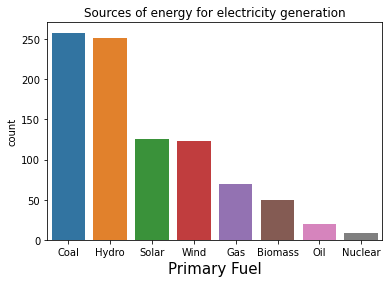

In [167]:

sns.countplot(x='primary_fuel',order=GPP_subset['primary_fuel'].value_counts().index,data =GPP_subset)
plt.xlabel('Primary Fuel',fontsize= 15)
plt.title('Sources of energy for electricity generation')
print(GPP_subset['primary_fuel'].value_counts())

- As visualised in the graph, maximum number of power plants uses coal as it's primary fuel.Number of Nuclear power plants are seen to be the lowest.
- However, a large portion of the the electricity is produced by the Nuclear power plant and the least through Biomass power plant.

In [55]:
GPP_subset.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'geolocation_source', 'year_of_capacity_data',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'generation_data_source'],
      dtype='object')

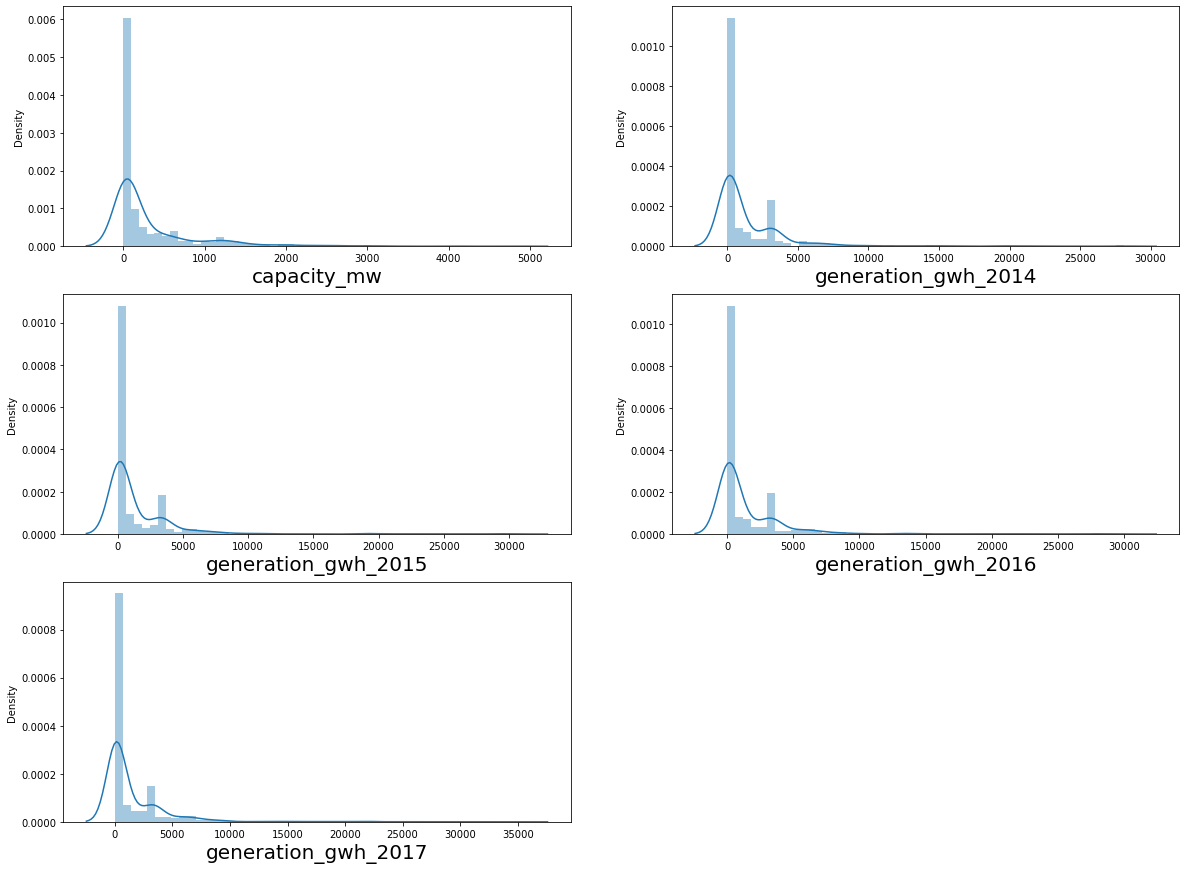

In [57]:
f=GPP_subset[['capacity_mw', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']]
plt.figure(figsize =(20,15), facecolor='white')
plotnumber=1
for i in f.columns:
    if plotnumber <= 5:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(f[i])
        plt.xlabel(i,fontsize=20)
    
    plotnumber +=1
plt.show()

- we can obsere that the columns that we have visualized are all right skewed

In [81]:

India_map = folium.Map(location=[21, 78], zoom_start=4)
India_map 

color = {'Coal' :'Red',
         'Hydro':'Blue',     
         'Solar' :'Yellow',   
          'Wind':'Pink',      
          'Gas':'Green',         
          'Biomass':'Brown',     
          'Oil':'Black',       
          'Nuclear':'gray'}

for idx, row in GPP_subset.iterrows():
    Circle(location=[row['latitude'], row['longitude']],
           radius=25,
           color=color.get(row['primary_fuel'], 'blue')
          ).add_to(India_map)

In [82]:
India_map

- Here we can visualize the different types of powerplants found throughout India

## Bivarient Analyses

#### Primary fuels vs features

Text(0.5, 1.0, 'Capacity of primary fuels')

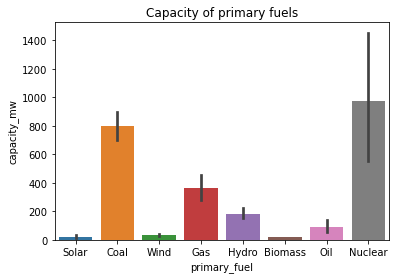

In [173]:
sns.barplot(x='primary_fuel',y ='capacity_mw', data=GPP_subset)
plt.title('Capacity of primary fuels')


- We see that Nuclear energy has the highest capacity followed by Coal,Gas,Hydro and oil. Solar wind and Biomass are founs to have least capacity in India

Text(0.5, 1.0, 'Commissioning years of each primary fuels')

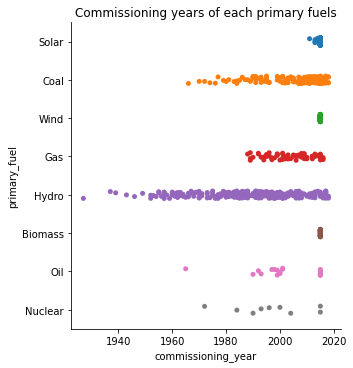

In [180]:
sns.catplot(x='commissioning_year',y = 'primary_fuel', data=GPP_subset)
plt.title('Commissioning years of each primary fuels')


- we can see that authorisation of hydro plants dated back to 1940s while the more recent ones are solar, wind and biomass

AxesSubplot(0.125,0.125;0.775x0.755)


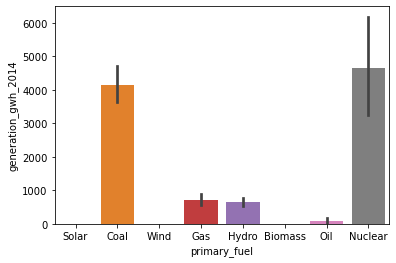

AxesSubplot(0.125,0.125;0.775x0.755)


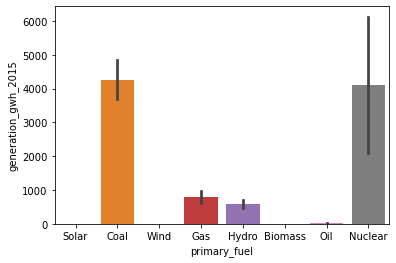

AxesSubplot(0.125,0.125;0.775x0.755)


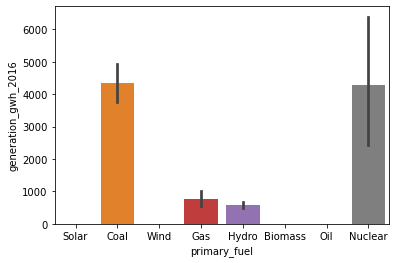

AxesSubplot(0.125,0.125;0.775x0.755)


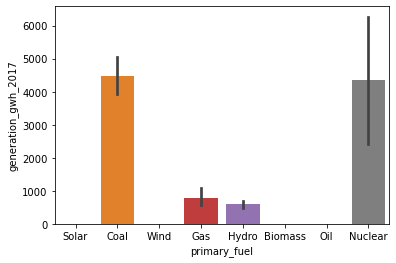

AxesSubplot(0.125,0.125;0.775x0.755)


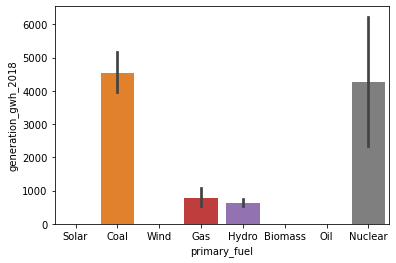

In [183]:
gen = ['generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018']
for i in gen:
    print(sns.barplot(x= 'primary_fuel', y=i,data = GPP_subset))
    plt.show()

- We can observe that all throughout the years Nuclear and Coal are generation more electricity as in compasrison to other fuels.

#### Capacity_mw vs features

AxesSubplot(0.125,0.125;0.775x0.755)


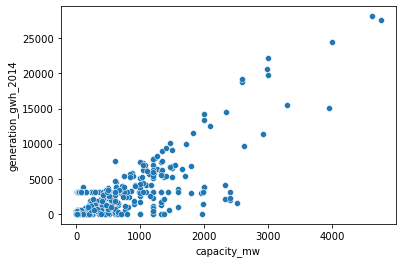

AxesSubplot(0.125,0.125;0.775x0.755)


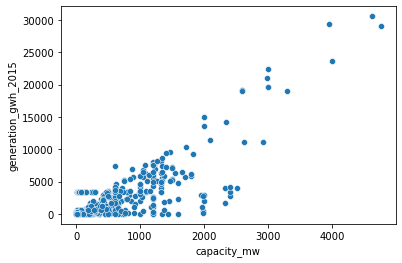

AxesSubplot(0.125,0.125;0.775x0.755)


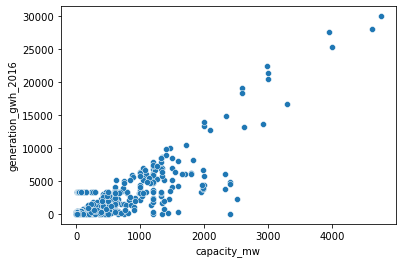

AxesSubplot(0.125,0.125;0.775x0.755)


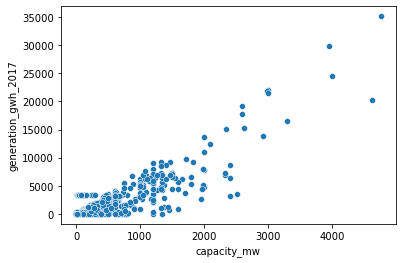

AxesSubplot(0.125,0.125;0.775x0.755)


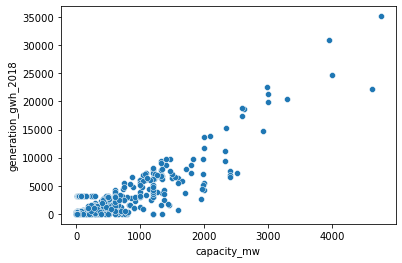

In [186]:
gen = ['generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018']
for i in gen:
    print(sns.scatterplot(x= 'capacity_mw', y=i,data = GPP_subset))
    plt.show()

- We can observe linear relationship between capacity and generation

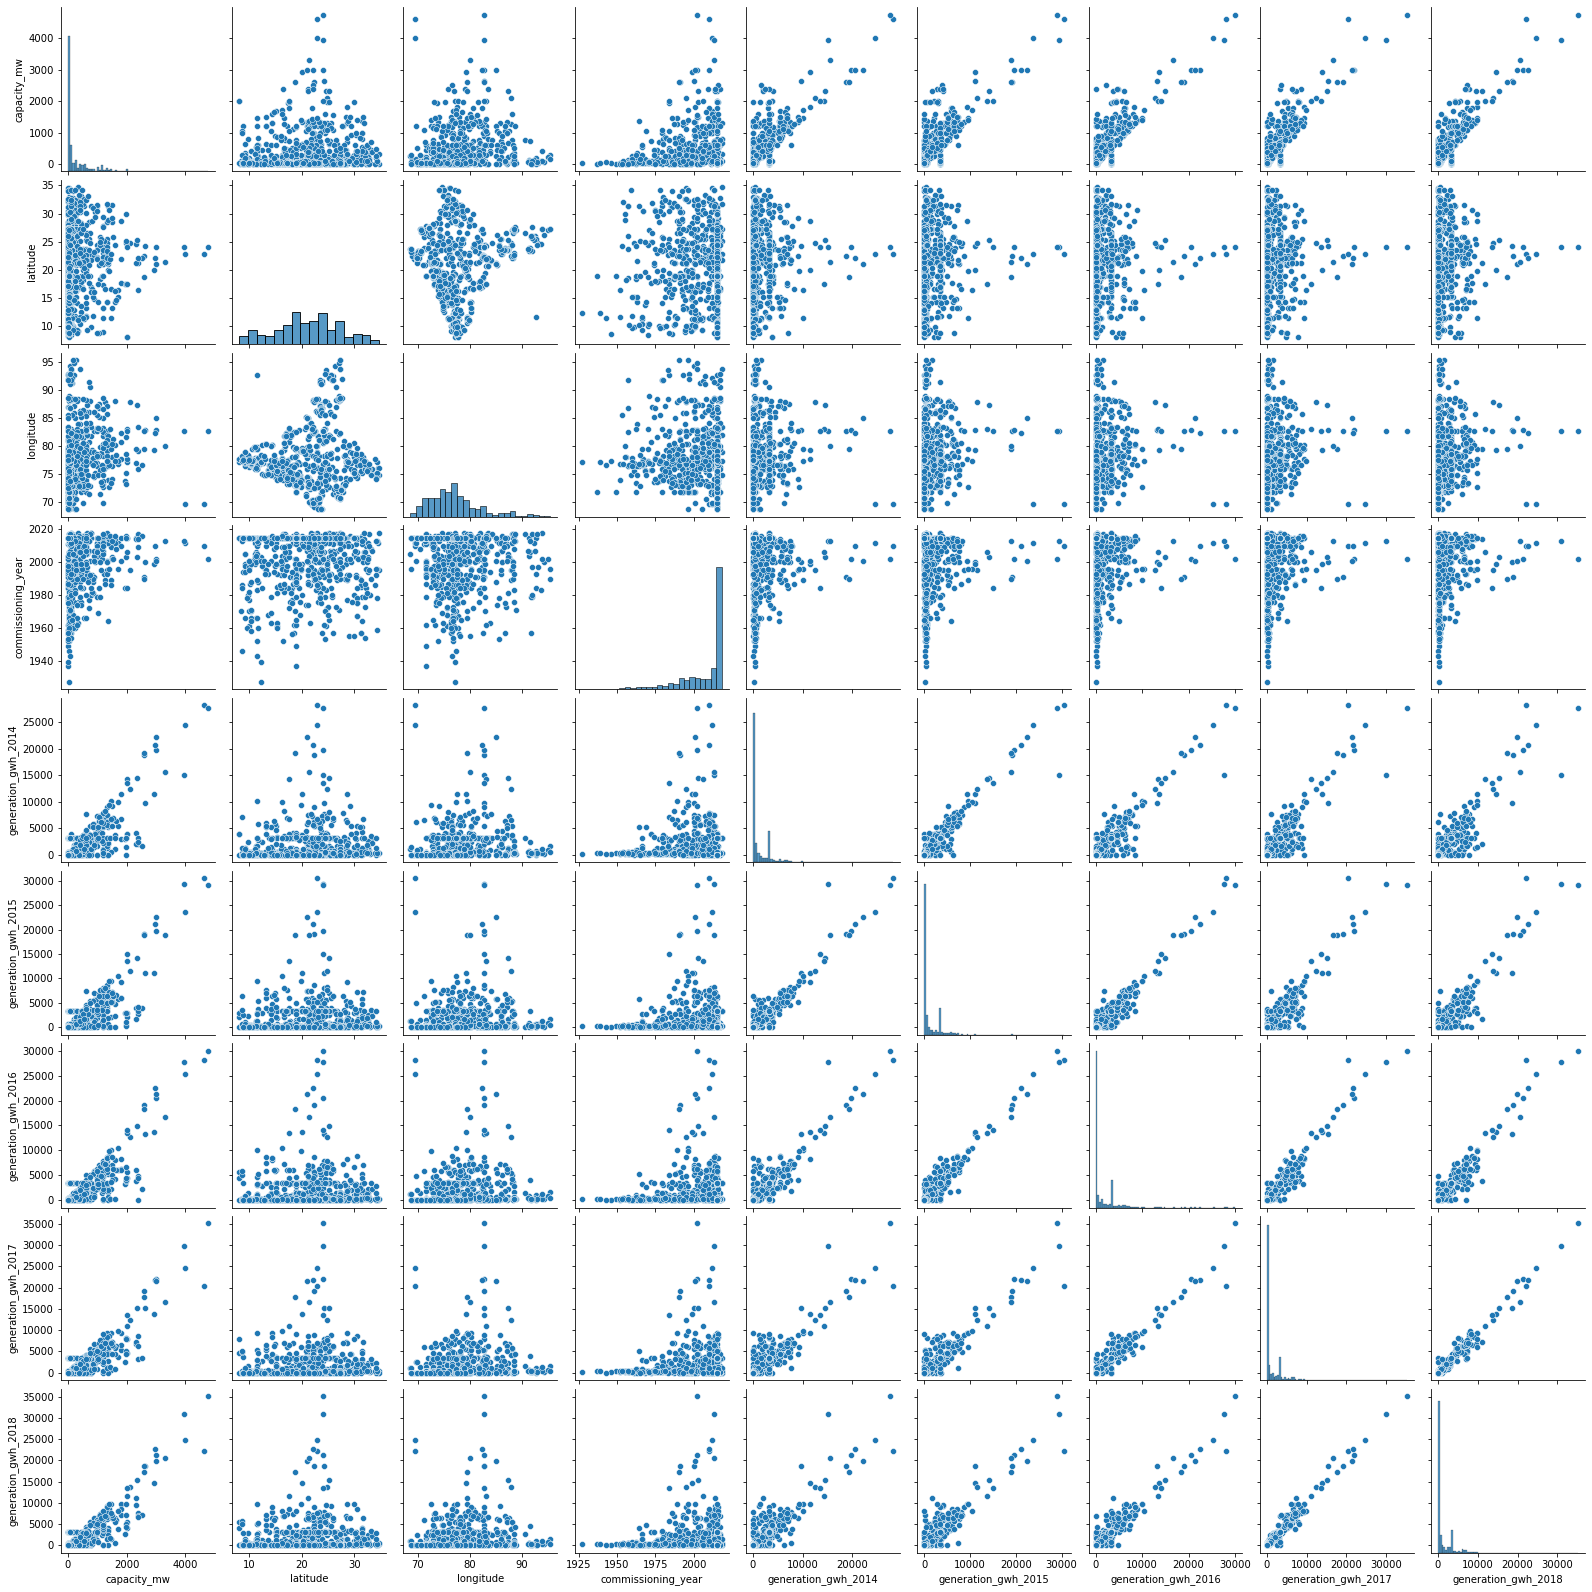

In [100]:
sns.pairplot(GPP_subset)

- Here we can observe the patterns between features and labels

## Encoding

In [197]:
from sklearn.preprocessing import LabelEncoder
enc= LabelEncoder()
for i in GPP_subset.columns:
    if GPP_subset[i].dtype== 'object':
        GPP_subset[i] = enc.fit_transform(GPP_subset[i].values)

## Correlation

<AxesSubplot:>

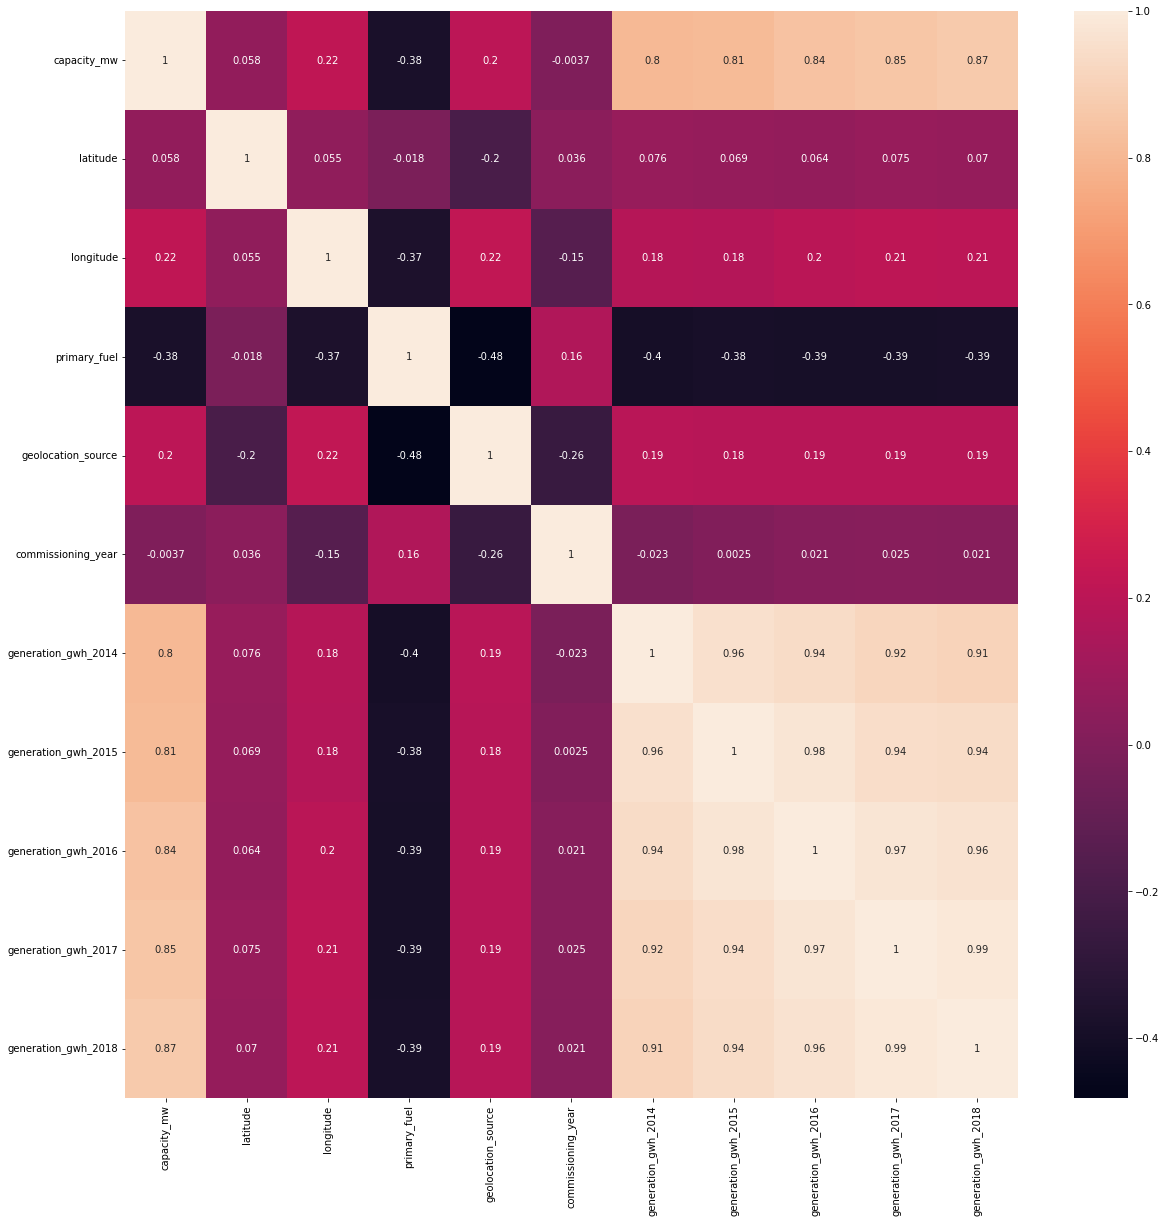

In [102]:
corr= GPP_subset.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot = True)

- We can visualise the corrrelation betweern features and label
- between feature we can see generation in each year seem higly correlated which is expected.
- capacity_mw is seen to be highly correlated with generation data of each year


In [64]:
GPP_subset.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'geolocation_source', 'year_of_capacity_data',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'generation_data_source'],
      dtype='object')

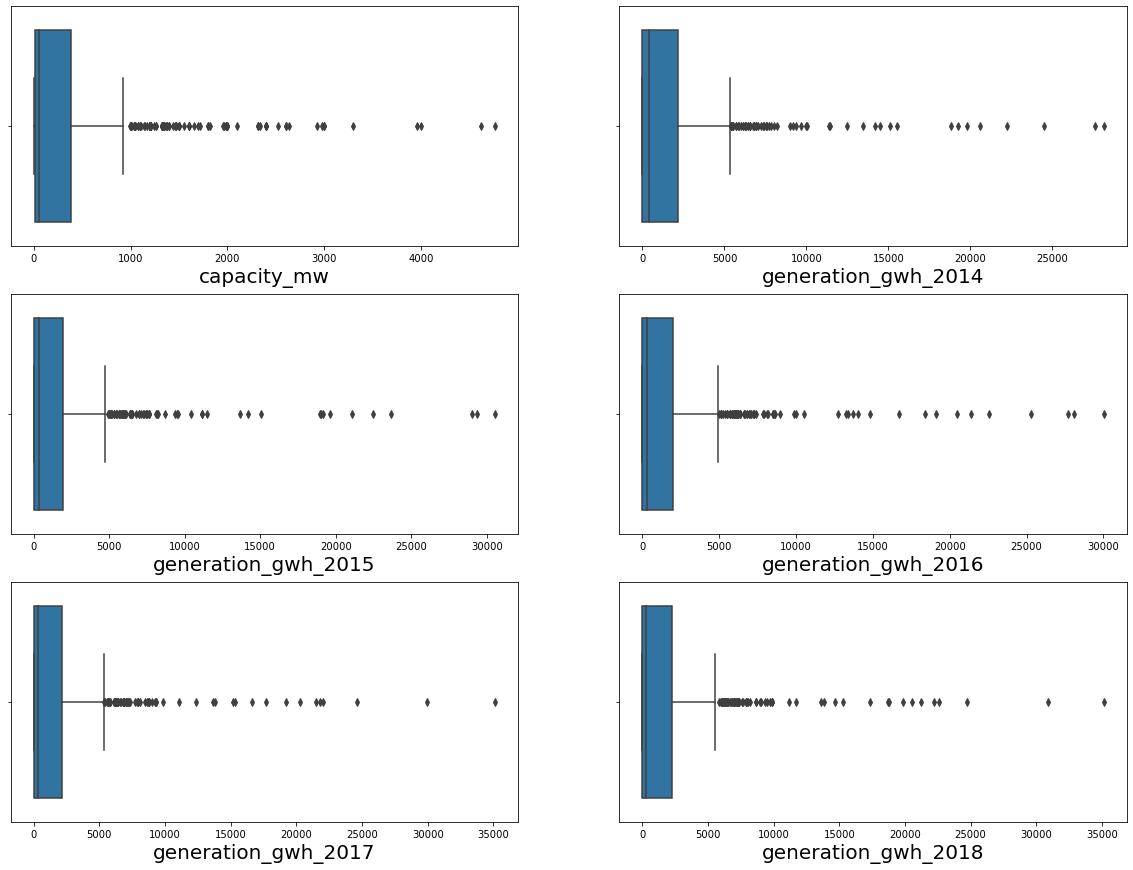

In [198]:
f=GPP_subset[['capacity_mw', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']]
plt.figure(figsize =(20,15), facecolor='white')
plotnumber=1
for i in f.columns:
    if plotnumber <= 6:
        ax = plt.subplot(3,2,plotnumber)
        sns.boxplot(f[i])
        plt.xlabel(i,fontsize=20)
    
    plotnumber +=1
plt.show()

In [67]:
GPP_subset.skew()

capacity_mw               3.121795
latitude                 -0.097710
longitude                 1.129984
primary_fuel              0.475196
commissioning_year       -1.713300
geolocation_source       -2.172086
year_of_capacity_data     0.000000
generation_gwh_2014       4.508955
generation_gwh_2015       4.846711
generation_gwh_2016       4.618328
generation_gwh_2017       4.640628
generation_gwh_2018       4.594704
generation_data_source    0.000000
dtype: float64

## Splitting data

In [210]:
X = GPP_subset.drop('capacity_mw',axis=1)
Y =GPP_subset['capacity_mw']

In [211]:
x = GPP_subset.drop('primary_fuel',axis=1)
y =GPP_subset['primary_fuel']

### Checking Skewness

In [212]:
X.skew()

latitude              -0.097710
longitude              1.129984
primary_fuel           0.475196
geolocation_source    -2.172086
commissioning_year    -1.713300
generation_gwh_2014    4.508955
generation_gwh_2015    4.846711
generation_gwh_2016    4.618328
generation_gwh_2017    4.640628
generation_gwh_2018    4.594704
dtype: float64

In [213]:

i=['generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018','longitude']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer()

X[i]= scaler.fit_transform(X[i].values)
X.skew()

latitude              -0.097710
longitude              0.040408
primary_fuel           0.475196
geolocation_source    -2.172086
commissioning_year    -1.713300
generation_gwh_2014   -0.118677
generation_gwh_2015   -0.086925
generation_gwh_2016   -0.080681
generation_gwh_2017   -0.073191
generation_gwh_2018   -0.081505
dtype: float64

In [203]:
x.skew()

capacity_mw            3.121795
latitude              -0.097710
longitude              1.129984
geolocation_source    -2.172086
commissioning_year    -1.713300
generation_gwh_2014    4.508955
generation_gwh_2015    4.846711
generation_gwh_2016    4.618328
generation_gwh_2017    4.640628
generation_gwh_2018    4.594704
dtype: float64

In [204]:
i= ['capacity_mw','generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018','longitude']

In [205]:
x[i]= scaler.fit_transform(x[i].values)
x.skew()

capacity_mw            0.023852
latitude              -0.097710
longitude              0.040408
geolocation_source    -2.172086
commissioning_year    -1.713300
generation_gwh_2014   -0.118677
generation_gwh_2015   -0.086925
generation_gwh_2016   -0.080681
generation_gwh_2017   -0.073191
generation_gwh_2018   -0.081505
dtype: float64

## Scaling data

In [214]:
#for regression model
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X= scaler.fit_transform(X)
X= pd.DataFrame(X)
X.head()

0         1         2         3         4         5         6  \
0  1.163528 -0.825997  1.227382 -1.089528  0.407931 -1.198081 -1.188594   
1  0.602540 -0.431027 -0.966793  0.392623  0.662204  1.098006  1.135581   
2  0.132670 -2.230563  1.666217  0.392623  0.662204 -1.198081 -1.188594   
3  0.455612  2.105104 -0.527958  0.392623 -0.037046  0.533664  0.674804   
4  0.141944  1.143947 -0.966793  0.392623  0.662204  1.079742  1.330346   

          7         8         9  
0 -1.185904 -1.171952 -1.173053  
1  1.131172  1.128968  1.098774  
2 -1.185904 -1.171952 -1.173053  
3  0.693132  0.604973  0.573330  
4  1.342776  1.277038  1.373025

In [114]:
#classification model
scaler= StandardScaler()
x= scaler.fit_transform(x)
x= pd.DataFrame(x)
x.head()

0         1         2         3         4         5         6  \
0 -1.707560  1.163528 -0.824528 -1.089528  0.407931 -1.173382 -1.168575   
1  0.193683  0.602540 -0.425658  0.392623  0.662204  1.125092  1.160165   
2 -0.293915  0.132670 -2.255208  0.392623  0.662204 -1.173382 -1.168575   
3  0.361281  0.455612  2.084356  0.392623 -0.037046  0.481567  0.645400   
4  1.647648  0.141944  1.141364  0.392623  0.662204  1.103609  1.383771   

          7         8         9  
0 -1.166911 -1.155194 -1.155260  
1  1.153500  1.149531  1.117497  
2 -1.166911 -1.155194 -1.155260  
3  0.666789  0.572462  0.535754  
4  1.394687  1.316862  1.431352

## Balancing data

In [219]:
from imblearn.over_sampling import SMOTE

x,y= SMOTE().fit_resample(x,y)

6    258
1    258
7    258
2    258
3    258
0    258
5    258
4    258
Name: primary_fuel, dtype: int64


<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

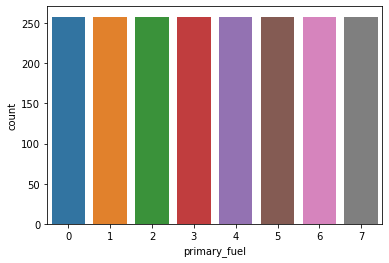

In [220]:
print(y.value_counts())
sns.countplot(y)

- The data is now balanced

## Model Building

In [128]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


In [121]:
#Selecting the best random state

MaxR2 = 0
MaxRS =0
for i in range(1,100):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.30,random_state=i)
    r = RandomForestRegressor()
    r.fit(X_train,Y_train)
    predr= r.predict(X_test)
    acc= r2_score(Y_test,predr)
    print('accuracy',acc,'random_state',1)
    
    if acc>MaxR2:
        MaxR2=acc
        MaxRS= i
print('Best r2 score is', MaxR2,'at random state', MaxRS)

accuracy 0.8783212350625023 random_state 1
accuracy 0.8634067399732516 random_state 1
accuracy 0.8879569296081834 random_state 1
accuracy 0.8184553225575847 random_state 1
accuracy 0.8890490179262464 random_state 1
accuracy 0.877461582640578 random_state 1
accuracy 0.8929709448982059 random_state 1
accuracy 0.8772532427409092 random_state 1
accuracy 0.9138237487437191 random_state 1
accuracy 0.8401360725143197 random_state 1
accuracy 0.9030780709865934 random_state 1
accuracy 0.9032351953548243 random_state 1
accuracy 0.8677801931531797 random_state 1
accuracy 0.8448526902606303 random_state 1
accuracy 0.8635918977836353 random_state 1
accuracy 0.8867489131847711 random_state 1
accuracy 0.7981683537380707 random_state 1
accuracy 0.8456537125855955 random_state 1
accuracy 0.8545520679954803 random_state 1
accuracy 0.8834660193755524 random_state 1
accuracy 0.8562904564256173 random_state 1
accuracy 0.8793151604425026 random_state 1
accuracy 0.878410884337093 random_state 1
accuracy 0.84

In [126]:
X_train, X_test,Y_train, Y_test= train_test_split(X,Y, test_size=.30, random_state=71)

In [129]:
algorithm = [LinearRegression(),RandomForestRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),SVR()]
for i in algorithm:
    print(i)
    i.fit(X_train,Y_train)
    pred = i.predict(X_test)
    
    print('R2 score: ',r2_score(Y_test,pred))
    print('MAE: ',mean_absolute_error(Y_test,pred))
    print('MSE: ',mean_squared_error(Y_test,pred))
    print('RMSE: ',np.sqrt(mean_squared_error(Y_test,pred)))
    cv = cross_val_score(i,X,Y,cv=5)
    
    print('Cross Validation Score: ', cv.mean())
    print('Difference in cross val score', r2_score(Y_test,pred)- abs(cv.mean()))
    print('**'*50)

LinearRegression()
R2 score:  0.34098073728165545
MAE:  298.8411540384462
MSE:  239534.79701528404
RMSE:  489.42292244569427
Cross Validation Score:  0.30320260103674157
Difference in cross val score 0.037778136244913885
****************************************************************************************************
RandomForestRegressor()
R2 score:  0.9195366733540579
MAE:  90.98896682994
MSE:  29246.135440425776
RMSE:  171.0150152484447
Cross Validation Score:  0.8622582586501647
Difference in cross val score 0.057278414703893166
****************************************************************************************************
KNeighborsRegressor()
R2 score:  0.6594651838767571
MAE:  153.96701691176472
MSE:  123774.74024090839
RMSE:  351.8163444766436
Cross Validation Score:  0.6468759394242067
Difference in cross val score 0.012589244452550385
****************************************************************************************************
AdaBoostRegressor()
R2 score:  0.6

- Random forest has a better r2_score of 91.95% and relatively better difference compared to cross validation score , hence selecting it as the best model

### Hyperparameter Tuning

In [135]:
n_estimators= [int(x) for x in np.linspace(start=10,stop=100,num=10)]
criterion=['squared_error', 'absolute_error', 'poisson']
max_depth= [2,3,4,5,6,7,8]
min_samples_split=[2,3,4,5,6,7,8,9] 
min_samples_leaf=[2,3,4,5,6,7,8,9] 
max_features= ['sqrt','log2']

In [136]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':n_estimators,'max_features': max_features,'max_depth':max_depth,'criterion':criterion,'min_samples_leaf':min_samples_leaf,'min_samples_split':min_samples_split}

In [137]:
GCV= GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [138]:
GCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]})

In [139]:
GCV.best_params_

{'criterion': 'squared_error',
 'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 50}

In [141]:
GCV_pred = GCV.best_estimator_.predict(X_test)

In [142]:
r2_score(Y_test,GCV_pred)

0.9071562208861461

- Tuning did not increase our final score. The default parameters may have performed better, hence saving it as the best model

In [143]:
RF = RandomForestRegressor()
RF.fit(X_train,Y_train)
pred = RF.predict(X_test)
print('R2 score: ',r2_score(Y_test,pred))
print('MAE: ',mean_absolute_error(Y_test,pred))
print('MSE: ',mean_squared_error(Y_test,pred))
print('RMSE: ',np.sqrt(mean_squared_error(Y_test,pred)))
    

R2 score:  0.9178499506446368
MAE:  91.41650946031959
MSE:  29859.211270949607
RMSE:  172.79818075127298


## MODEL SAVING

In [144]:
import joblib

In [145]:
joblib.dump(RF,'GlobalPowerPlantRegression.pkl')

['GlobalPowerPlantRegression.pkl']

# CLASSIFICATION MODEL

In [221]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report


In [222]:
MaxAcc = 0
MaxRS =0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    predrf= rf.predict(x_test)
    acc= accuracy_score(y_test,predrf)
    print('accuracy',acc,'random_state',1)
    if acc>MaxAcc:
        MaxAcc=acc
        MaxRS= i
print('Best accuracy is', MaxAcc,'at random state', MaxRS)

accuracy 0.9193548387096774 random_state 1
accuracy 0.9306451612903226 random_state 1
accuracy 0.9225806451612903 random_state 1
accuracy 0.9209677419354839 random_state 1
accuracy 0.9258064516129032 random_state 1
accuracy 0.9129032258064517 random_state 1
accuracy 0.9258064516129032 random_state 1
accuracy 0.9258064516129032 random_state 1
accuracy 0.9225806451612903 random_state 1
accuracy 0.9370967741935484 random_state 1
accuracy 0.9306451612903226 random_state 1
accuracy 0.9274193548387096 random_state 1
accuracy 0.9354838709677419 random_state 1
accuracy 0.9209677419354839 random_state 1
accuracy 0.9403225806451613 random_state 1
accuracy 0.9387096774193548 random_state 1
accuracy 0.9467741935483871 random_state 1
accuracy 0.9483870967741935 random_state 1
accuracy 0.9370967741935484 random_state 1
accuracy 0.9306451612903226 random_state 1
accuracy 0.9290322580645162 random_state 1
accuracy 0.932258064516129 random_state 1
accuracy 0.9370967741935484 random_state 1
accuracy 0.9

In [223]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=121)


In [224]:
algorithm = [LogisticRegression(),RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),SVC()]
for i in algorithm:
    print(i)
    i.fit(x_train,y_train)
    pred = i.predict(x_test)
    
    print('Accuracy: \n',accuracy_score(y_test,pred))
    print('Confusion matrix: \n',confusion_matrix(y_test,pred))
    print('Classification report: \n',classification_report(y_test,pred))
    cv = cross_val_score(i,x,y,cv=10)
    
    print('Cross Validation Score: \n', cv.mean())
    print('Difference in cross val score\n', accuracy_score(y_test,pred)- abs(cv.mean()))
    print('**'*50)


LogisticRegression()
Accuracy: 
 0.43870967741935485
Confusion matrix: 
 [[ 0  0  0  0  0  0 79 13]
 [ 0 34  7  6 17  2  0  0]
 [ 0  1 21 39  1  8  0  0]
 [ 0  1 13 47  3  1  0  1]
 [ 0 32  0  0 46  0  0  0]
 [ 0  0  0  2  0 42 15 17]
 [ 0  0  0  0  0  7 74  3]
 [ 0  0  0  0  0 25 55  8]]
Classification report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        92
           1       0.50      0.52      0.51        66
           2       0.51      0.30      0.38        70
           3       0.50      0.71      0.59        66
           4       0.69      0.59      0.63        78
           5       0.49      0.55      0.52        76
           6       0.33      0.88      0.48        84
           7       0.19      0.09      0.12        88

    accuracy                           0.44       620
   macro avg       0.40      0.46      0.40       620
weighted avg       0.38      0.44      0.39       620

Cross Validation Score: 
 0.544566

- RandomForestClassifier was found to have the best accuracy of 95.56 and cross validation score 93.80. This will be saved as our best model

In [230]:
RFC =RandomForestClassifier()
RFC.fit(x_train,y_train)
pred = RFC.predict(x_test)
print('Accuracy: \n',accuracy_score(y_test,pred))
print('Confusion matrix: \n',confusion_matrix(y_test,pred))
print('Classification report: \n',classification_report(y_test,pred))

Accuracy: 
 0.9532258064516129
Confusion matrix: 
 [[90  0  0  0  0  0  0  2]
 [ 0 56  4  1  3  2  0  0]
 [ 0  1 67  2  0  0  0  0]
 [ 0  3  2 57  3  1  0  0]
 [ 0  0  0  0 78  0  0  0]
 [ 0  0  0  0  0 76  0  0]
 [ 0  0  0  0  0  0 84  0]
 [ 5  0  0  0  0  0  0 83]]
Classification report: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.96        92
           1       0.93      0.85      0.89        66
           2       0.92      0.96      0.94        70
           3       0.95      0.86      0.90        66
           4       0.93      1.00      0.96        78
           5       0.96      1.00      0.98        76
           6       1.00      1.00      1.00        84
           7       0.98      0.94      0.96        88

    accuracy                           0.95       620
   macro avg       0.95      0.95      0.95       620
weighted avg       0.95      0.95      0.95       620



## Saving best model

In [233]:
joblib.dump(RFC,'GlobalPowerPlantClassifier.pkl')

['GlobalPowerPlantClassifier.pkl']